# K-Nearest Neighbours (Classification) Practical

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"E:\subscription_purchase_data.csv")
dataset.head(3)

,Age,Salary,Purchased
0,56,72662,1
1,46,118506,1
2,32,32688,0


In [3]:
dataset.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [4]:
x = dataset.iloc[:, :-1]
y = dataset['Purchased']

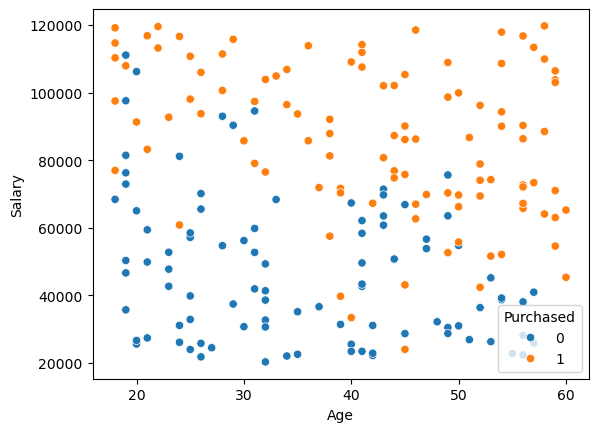

In [5]:
sns.scatterplot(x='Age', y='Salary', data=dataset, hue='Purchased')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
knn.score(x_test, y_test)*100

87.5

In [21]:
knn.score(x_train, y_train)*100

88.75

In [18]:
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print(knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100, i)

100.0 87.5 1
86.875 90.0 2
88.75 87.5 3
86.25 92.5 4
88.75 90.0 5
87.5 85.0 6
86.25 92.5 7
86.25 90.0 8
86.875 92.5 9
85.0 92.5 10
86.875 95.0 11
85.625 90.0 12
85.625 92.5 13
85.0 95.0 14
86.875 92.5 15
86.25 95.0 16
85.625 92.5 17
84.375 95.0 18
85.625 92.5 19


In [22]:
dataset.tail()

,Age,Salary,Purchased
195,43,69726,0
196,49,70300,1
197,23,42677,0
198,49,75609,0
199,21,116825,1


In [31]:
knn.predict([[-1.254035	,-0.852484]])

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [27]:
confusion_matrix(y_test, knn.predict(x_test))

array([[20,  3],
       [ 2, 15]])

In [28]:
x.tail()

,Age,Salary
195,0.317930,0.067939
196,0.789519,0.087471
197,-1.254035,-0.852484
198,0.789519,0.268125
199,-1.411231,1.670622


In [32]:
pd.DataFrame(y)

,Purchased
0,1
1,1
2,0
3,1
4,0
...,...
195,0
196,1
197,0
198,0


In [33]:
from mlxtend.plotting import plot_decision_regions

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


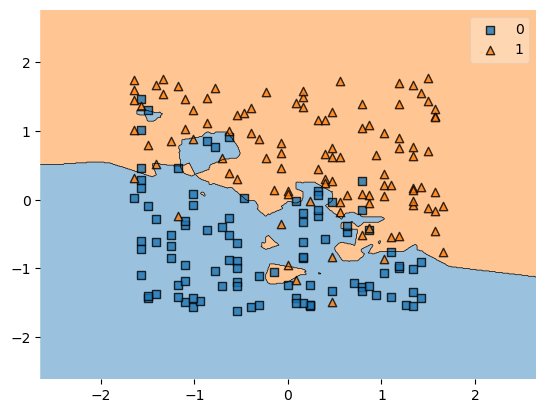

In [35]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)
plt.show()

# K-Nearest Neighbours(Regression)

In [36]:
dataset = pd.read_csv("E:\\experience.csv")
dataset.head(3)

,age,experience,salary
0,58,37.0,78974.33
1,48,28.3,64824.99
2,34,16.3,46322.36


In [37]:
x = dataset.drop(columns='salary')
y = dataset['salary']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [41]:
knn.score(x_test, y_test)*100

97.36906750485738

In [42]:
knn.score(x_train, y_train)*100

97.50810027833559

In [43]:
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    print(knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100, i)

100.0 96.01497730997984 1
98.40729179912977 97.0231453312276 2
98.02345958535574 97.5118265784813 3
97.76502902879052 97.74803979057472 4
97.50810027833559 97.36906750485738 5
97.42055354959177 97.52657478477553 6
97.29823108172081 97.53745531205269 7
97.07788279652306 97.54663655317526 8
96.97568169606556 97.3954237881232 9
96.90891370488792 97.29761463645713 10
96.84770277356417 97.41882774627265 11
96.69662261199043 97.37873077278645 12
96.6953001961638 97.22652209688827 13
96.65050106099649 97.21309477398533 14
96.51581546745471 97.11371405907869 15
96.47139363036952 97.02072822557015 16
96.39412702358581 97.07258147248695 17
96.31390677938514 96.89957582748626 18
96.25511037090733 96.82352615506124 19


# Support Vector Machines(SVM) - Classification

In [44]:
dataset = pd.read_csv(r"E:\data_analysis_200_rows.csv")
dataset.head()

,CGPA,Placement Score,Placement Status
0,6.87,78.52,0
1,9.75,45.05,1
2,8.66,49.70,0
3,7.99,93.91,0
4,5.78,76.39,1


In [50]:
dataset['Placement Score'] = dataset['Placement Score']*2

In [51]:
dataset.tail()

,CGPA,Placement Score,Placement Status
195,6.75,6.390000,0
196,8.63,6.100000,0
197,9.49,4.382667,1
198,9.44,5.670000,1
199,8.90,5.684667,0


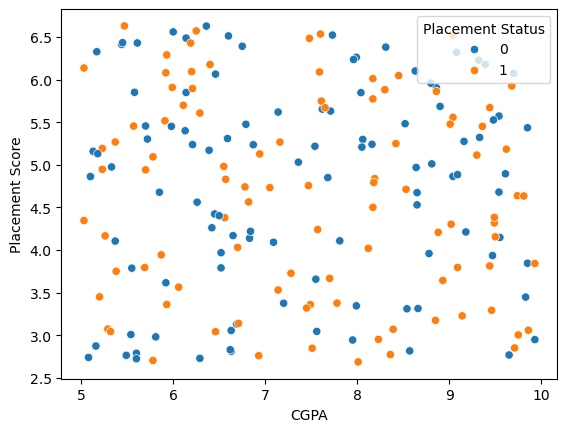

In [52]:
sns.scatterplot(x='CGPA', y='Placement Score', hue='Placement Status', data=dataset)
plt.show()

In [53]:
x = dataset.iloc[:, :-1]
y = dataset['Placement Status']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.svm import SVC

In [60]:
sv = SVC(kernel = 'poly')
sv.fit(x_train, y_train)

SVC(kernel='poly')

In [61]:
sv.score(x_test, y_test)*100

40.0

In [62]:
sv.score(x_train, y_train)*100

58.12500000000001

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


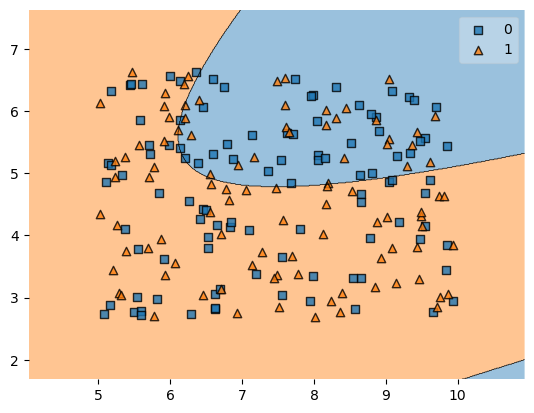

In [63]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=sv)
plt.show()

In [64]:
dataset = pd.read_csv("E:\\cgpa.csv")
dataset.head()

,cgpa,package
0,2.75,13.07
1,3.90,19.73
2,3.46,17.59
3,3.20,15.29
4,2.31,13.42


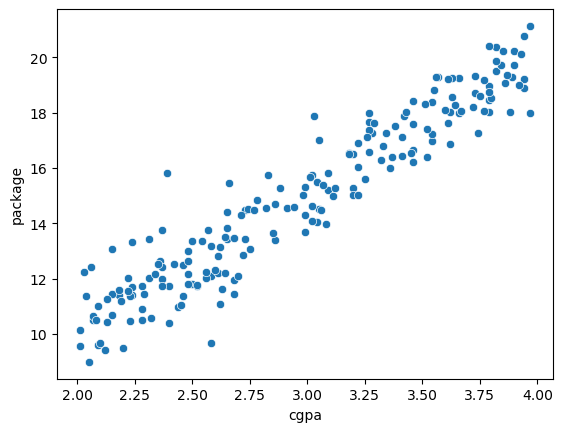

In [65]:
sns.scatterplot(x='cgpa', y='package', data=dataset)
plt.show()

In [66]:
x = dataset[['cgpa']]
y = dataset['package']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [68]:
from sklearn.svm import SVR

In [73]:
sv = SVR(kernel = 'poly')
sv.fit(x_train, y_train)

SVR(kernel='poly')

In [74]:
sv.score(x_test, y_test)*100

86.94800536713491

In [75]:
sv.score(x_train, y_train)*100

88.64979398433269

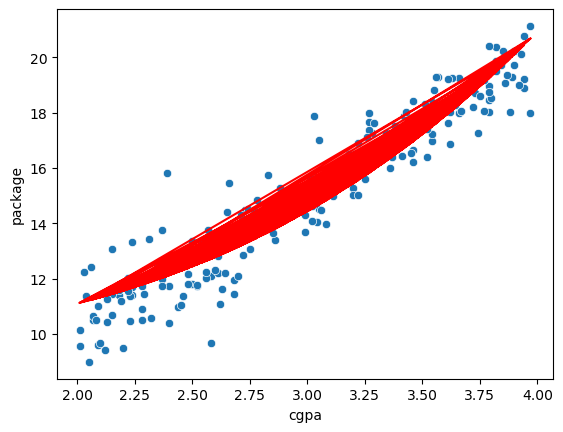

In [76]:
sns.scatterplot(x='cgpa', y='package', data=dataset)
plt.plot(dataset['cgpa'], sv.predict(x), color='red')
plt.show()

# Model Parameter, Hyperparameter, and Tunning

In [77]:
dataset = pd.read_csv("E:\\salary.csv")
dataset.head()

,Level,Salary
0,1,9003.570765
1,2,7388.678494
2,3,12918.442691
3,4,18935.149282
4,5,11829.233126


In [78]:
x = dataset.iloc[:, :-1]
y = dataset['Salary']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
dt = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 7, splitter= 'best')
dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7)

In [93]:
dt.score(x_test, y_test)*100

99.89249130498862

In [83]:
dt.score(x_train, y_train)*100

100.0

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [88]:
df = {
    "criterion":['Squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(2, 20)]
}

In [89]:
gd = GridSearchCV(DecisionTreeRegressor(), param_grid=df)

In [90]:
gd.fit(x_train, y_train)

E:\Anaconda Installed\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda Installed\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anaconda Installed\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "E:\Anaconda Installed\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['Squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [91]:
gd.best_params_

{'criterion': 'friedman_mse', 'max_depth': 7, 'splitter': 'best'}

In [94]:
gd.best_score_

np.float64(0.9989944661362109)

In [95]:
rd = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=df, n_iter=20)

In [96]:
rd.fit(x_train, y_train)

E:\Anaconda Installed\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda Installed\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anaconda Installed\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "E:\Anaconda Installed\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_pa

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['Squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [97]:
rd.best_params_

{'splitter': 'best', 'max_depth': 19, 'criterion': 'friedman_mse'}

In [99]:
rd.best_score_

np.float64(0.9989761229092764)

In [100]:
dataset = pd.read_csv("E:\\salary.csv")
dataset.head()

,Level,Salary
0,1,9003.570765
1,2,7388.678494
2,3,12918.442691
3,4,18935.149282
4,5,11829.233126


In [101]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [102]:
dt.score(x_test, y_test)*100

99.89018756117387

In [103]:
df = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"], 
    'max_depth': [i for i in range(2, 20)],
    'splitter': ["best", "random"]
}

In [104]:
gd = GridSearchCV(DecisionTreeRegressor(), param_grid=df)
gd.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [105]:
gd.best_params_

{'criterion': 'squared_error', 'max_depth': 7, 'splitter': 'best'}

In [106]:
gd.best_score_

np.float64(0.9989944661362109)

# Cross-validation

In [107]:
dataset = pd.read_csv("E:\\cgpa.csv")
dataset.head()

,cgpa,package
0,2.75,13.07
1,3.90,19.73
2,3.46,17.59
3,3.20,15.29
4,2.31,13.42


In [108]:
x = dataset.iloc[:, :-1]
y = dataset['package']

In [109]:
new_data = dataset.head(10)

In [111]:
x_new = new_data.iloc[:, :-1]
y_new = new_data['package']

In [112]:
from sklearn.model_selection import LeaveOneOut, LeavePOut, KFold, StratifiedKFold

In [116]:
lo = LeaveOneOut()
for train, test in lo.split(x_new, y_new):
    print(train, test)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [114]:
new_data #see indexes

,cgpa,package
0,2.75,13.07
1,3.90,19.73
2,3.46,17.59
3,3.20,15.29
4,2.31,13.42
5,2.31,12.02
6,2.12,9.41
7,3.73,19.31
8,3.20,15.03
9,3.42,17.89


In [117]:
lo = LeavePOut(2)
for train, test in lo.split(x_new, y_new):
    print(train, test)

[2 3 4 5 6 7 8 9] [0 1]
[1 3 4 5 6 7 8 9] [0 2]
[1 2 4 5 6 7 8 9] [0 3]
[1 2 3 5 6 7 8 9] [0 4]
[1 2 3 4 6 7 8 9] [0 5]
[1 2 3 4 5 7 8 9] [0 6]
[1 2 3 4 5 6 8 9] [0 7]
[1 2 3 4 5 6 7 9] [0 8]
[1 2 3 4 5 6 7 8] [0 9]
[0 3 4 5 6 7 8 9] [1 2]
[0 2 4 5 6 7 8 9] [1 3]
[0 2 3 5 6 7 8 9] [1 4]
[0 2 3 4 6 7 8 9] [1 5]
[0 2 3 4 5 7 8 9] [1 6]
[0 2 3 4 5 6 8 9] [1 7]
[0 2 3 4 5 6 7 9] [1 8]
[0 2 3 4 5 6 7 8] [1 9]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 3 5 6 7 8 9] [2 4]
[0 1 3 4 6 7 8 9] [2 5]
[0 1 3 4 5 7 8 9] [2 6]
[0 1 3 4 5 6 8 9] [2 7]
[0 1 3 4 5 6 7 9] [2 8]
[0 1 3 4 5 6 7 8] [2 9]
[0 1 2 5 6 7 8 9] [3 4]
[0 1 2 4 6 7 8 9] [3 5]
[0 1 2 4 5 7 8 9] [3 6]
[0 1 2 4 5 6 8 9] [3 7]
[0 1 2 4 5 6 7 9] [3 8]
[0 1 2 4 5 6 7 8] [3 9]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 5 7 8 9] [4 6]
[0 1 2 3 5 6 8 9] [4 7]
[0 1 2 3 5 6 7 9] [4 8]
[0 1 2 3 5 6 7 8] [4 9]
[0 1 2 3 4 7 8 9] [5 6]
[0 1 2 3 4 6 8 9] [5 7]
[0 1 2 3 4 6 7 9] [5 8]
[0 1 2 3 4 6 7 8] [5 9]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 7 9] [6 8]
[0 1 2 3 4 5 7 8

In [118]:
lo = KFold(n_splits=5)
for train, test in lo.split(x_new, y_new):
    print(train, test)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
from sklearn.model_selection import cross_val_score

In [123]:
p = cross_val_score(LinearRegression(), x, y, cv=5)

In [127]:
p.sort()
p*100

array([85.08826462, 87.89101028, 90.99811485, 92.61432718, 93.23301484])

In [128]:
p = cross_val_score(LinearRegression(), x, y, cv=KFold(n_splits=10))

In [129]:
p.sort()
p*100

array([84.86964008, 85.45641703, 86.87774067, 89.11420315, 90.11796876,
       90.12089068, 90.58372492, 91.54935391, 93.73316861, 95.47236893])